In [2]:
import pandas as pd
import numpy as np
from math import sin, cos, pi, atan2, asin
import matplotlib.pyplot as plt
from scipy import integrate

from get_YPR_matrix2 import convert_YPR_fixed_frame

In [3]:
def readCSV(filename):
    with open(filename) as csvDataFile:
        # Read file as csv
        df = pd.read_csv(csvDataFile)
    return df


################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = 'PostCal_1_28.csv'
fields = ['Timestamp',
  'Roll', 'Pitch', 'Yaw',
  'Accel Z',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z'
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata = all_time
tdata = tdata - all_time[0]

In [3]:
ax_vn = df['LinearAccelNed X'] * ft
ay_vn = df['LinearAccelNed Y'] * ft
az_vn = df['LinearAccelNed Z'] * -ft
azb = df['Accel Z'] * -ft

vx_vn, vy_vn, vz_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
x_vn, y_vn, z_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
dt = tdata[1]

vx_vn = integrate.cumtrapz(ax_vn, tdata, initial=0)
vy_vn = integrate.cumtrapz(ay_vn, tdata, initial=0)
vz_vn = integrate.cumtrapz(az_vn, tdata, initial=0)
vzb = integrate.cumtrapz(azb, tdata, initial=0)

x_vn = integrate.cumtrapz(vx_vn, tdata, initial=0)
y_vn = integrate.cumtrapz(vy_vn, tdata, initial=0)
z_vn = integrate.cumtrapz(vz_vn, tdata, initial=0)
xzb = integrate.cumtrapz(vzb, tdata, initial=0)

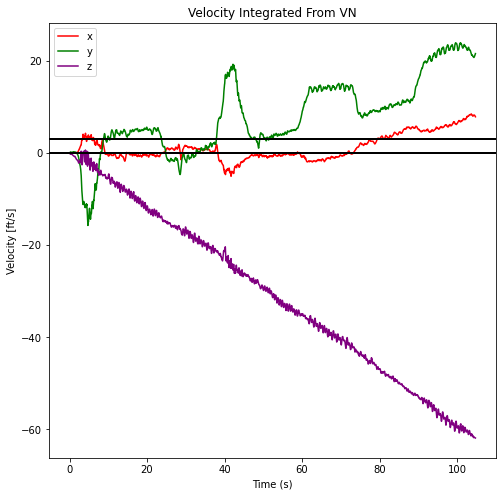

In [6]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, vx_vn, color='red', label='x')
l3 = ax.plot(tdata, vy_vn, color='green', label='y')
l4 = ax.plot(tdata, vz_vn, color='purple', label='z')
#l4 = ax.plot(tdata, vzb, color='red', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
l5 = plt.axhline(y=3, color='black', linewidth=2)
ax.set_title("Velocity Integrated From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Velocity [ft/s]")
ax.legend()
#Axes.set_ylimit(bottom=-80, top=20)
plt.show()

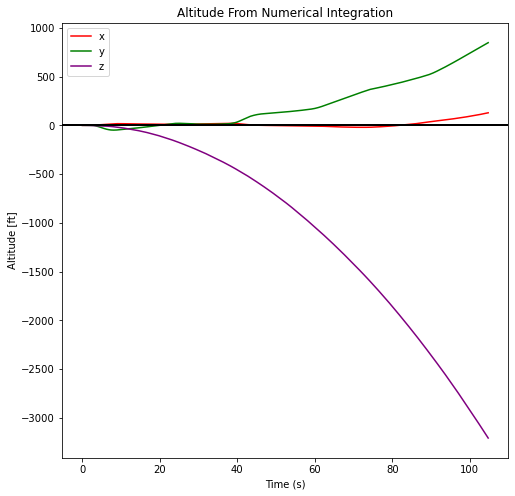

In [5]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
#l1 = ax.plot(tdata, altitude_NASA_pres, color='blue', label='NASA Pressure')
l2 = ax.plot(tdata, x_vn, color='red', label='x')
l3 = ax.plot(tdata, y_vn, color='green', label='y')
l4 = ax.plot(tdata, z_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
plt.show()